In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential

In [2]:
# import splitfolders
# splitfolders.ratio('Indian', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [2]:
img_width=180
img_height=180

In [3]:
train_path =r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\train'
test_path=r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\test'
val_path=r'C:\Users\Siyag\OneDrive\Desktop\New folder\DL PROJECT\output\val'

In [4]:
data_train= tf.keras.utils.image_dataset_from_directory(
    train_path,#path of folder
    shuffle=True,#its wike random state 
    image_size=(img_width,img_height),#image dimensions 
    batch_size=32,
    validation_split=False
)

Found 34190 files belonging to 35 classes.


In [5]:
data_val= tf.keras.utils.image_dataset_from_directory(
    val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 4271 files belonging to 35 classes.


In [6]:
data_test= tf.keras.utils.image_dataset_from_directory(
    test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 4278 files belonging to 35 classes.


In [28]:
data_cat=data_train.class_names

In [30]:
data_cat

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

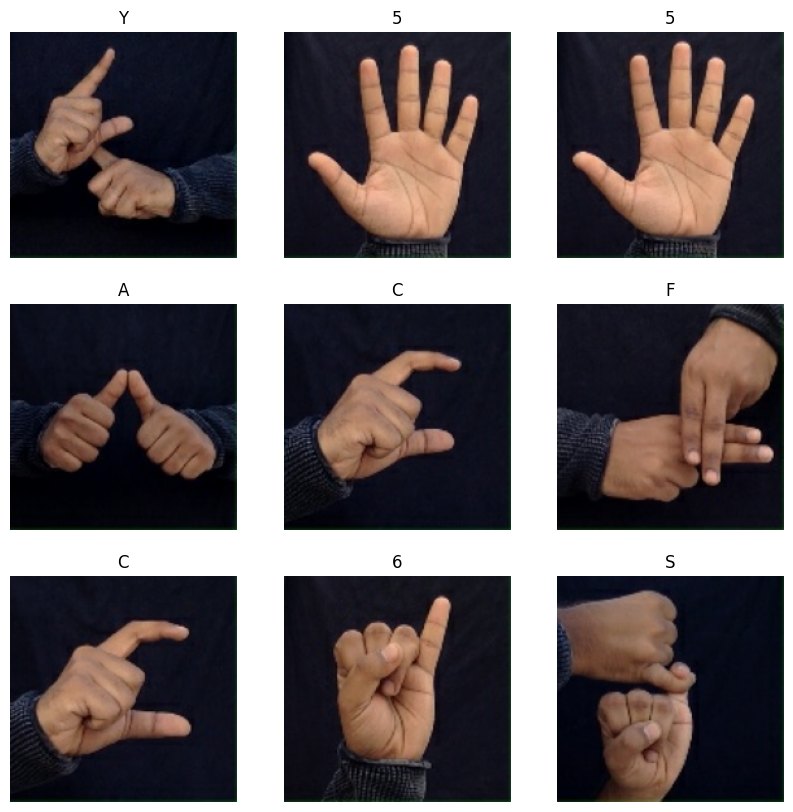

In [8]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

In [9]:
data_train


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
model= Sequential([
    layers.Rescaling(1./255),#getting color in the specified range
    layers.Conv2D(16,3,padding='same',activation='relu'),
    #will convert the (180,180,3)in single ,16 is number of neyrons in a layer
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])  

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [13]:

epochs_size=30
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/30




1069/1069 [==============================] - 171s 158ms/step - loss: 0.0444 - accuracy: 0.9902 - val_loss: 3.3984e-04 - val_accuracy: 0.9998
Epoch 2/30
1069/1069 [==============================] - 171s 160ms/step - loss: 0.0146 - accuracy: 0.9970 - val_loss: 0.0098 - val_accuracy: 0.9960
Epoch 3/30
1069/1069 [==============================] - 187s 175ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 5.9256e-05 - val_accuracy: 1.0000
Epoch 4/30
1069/1069 [==============================] - 192s 179ms/step - loss: 6.4275e-06 - accuracy: 1.0000 - val_loss: 6.7498e-05 - val_accuracy: 1.0000
Epoch 5/30
1069/1069 [==============================] - 194s 181ms/step - loss: 3.8279e-06 - accuracy: 1.0000 - val_loss: 6.8845e-05 - val_accuracy: 1.0000
Epoch 6/30
1069/1069 [==============================] - 184s 172ms/step - loss: 9.3533e-07 - accuracy: 1.0000 - val_loss: 9.8858e-05 - val_accuracy: 1.0000
Epoch 7/30
1069/1069 [==============================] - 181s 169ms/step - loss: 4.8191e-0

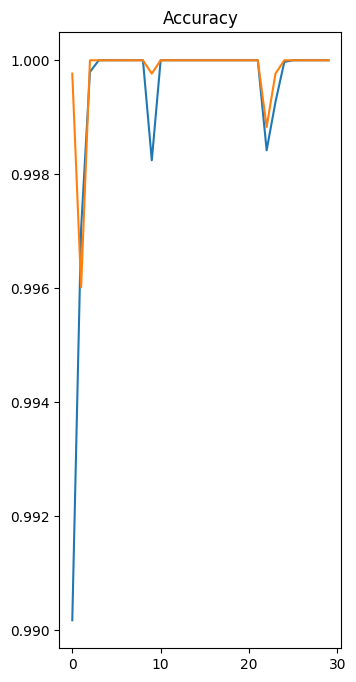

Text(0.5, 1.0, 'Loss')

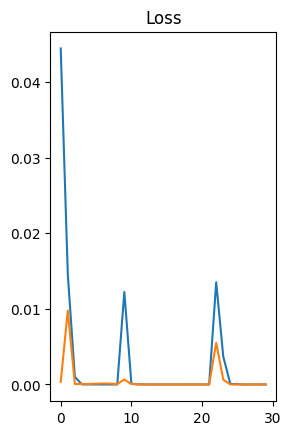

In [14]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [15]:
image = 'test1.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [16]:
predict = model.predict(img_bat)

1/1 [==============================] - 1s 1s/step


In [18]:
score=tf.nn.softmax(predict)

In [19]:
print('Alphabet in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Aplthabet in image is G with accuracy of 100.00


In [30]:
from tensorflow.keras import layers, Model

def vgg_model(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dense(4096, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Assuming `data_cat` is the number of categories in your dataset
# and `input_shape` is the shape of your input images
data_cat = 35  # Update this with the correct number of classes in your dataset
input_shape = (180, 180, 3)  # Assuming your input image shape is (180, 180, 3)

model = vgg_model(input_shape, data_cat)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming data_train and data_val are your training and validation datasets
# Perform any necessary preprocessing or formatting of the data beforehand

# Train the model
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, verbose=1)


In [31]:
from tensorflow.keras import layers, Model

def resnet_block(x, filters, kernel_size=3, stride=1, conv_shortcut=True):
    """
    A residual block for ResNet
    """
    shortcut = x
    if conv_shortcut:
        shortcut = layers.Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

def resnet(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    x = resnet_block(x, 64)
    x = resnet_block(x, 64)

    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 128)

    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 256)

    x = resnet_block(x, 512, stride=2)
    x = resnet_block(x, 512)

    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Assuming `data_cat` is the number of categories in your dataset
# and `input_shape` is the shape of your input images
data_cat = 35  # Assuming this is defined somewhere in your code
input_shape = (180, 180, 3)  # Assuming your input image shape is (180, 180, 3)

model = resnet(input_shape, data_cat)


In [32]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming data_train and data_val are your training and validation datasets
# Perform any necessary preprocessing or formatting of the data beforehand

# Train the model
epochs_size = 3
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, verbose=1)


Epoch 1/3
1069/1069 [==============================] - 1544s 1s/step - loss: 0.0605 - accuracy: 0.9875 - val_loss: 0.3771 - val_accuracy: 0.9248
Epoch 2/3
1069/1069 [==============================] - 1786s 2s/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 1.5915e-05 - val_accuracy: 1.0000
Epoch 3/3
1069/1069 [==============================] - 1782s 2s/step - loss: 3.3695e-05 - accuracy: 1.0000 - val_loss: 5.5126e-06 - val_accuracy: 1.0000


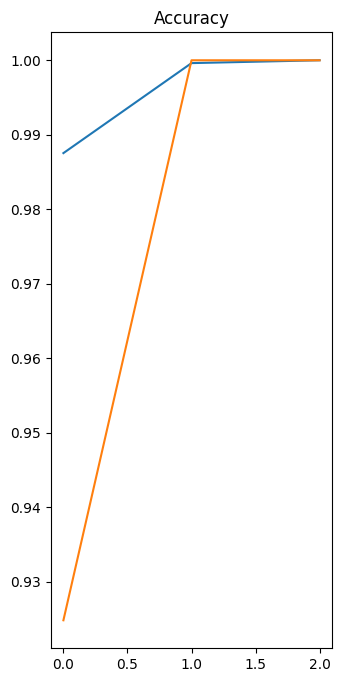

Text(0.5, 1.0, 'Loss')

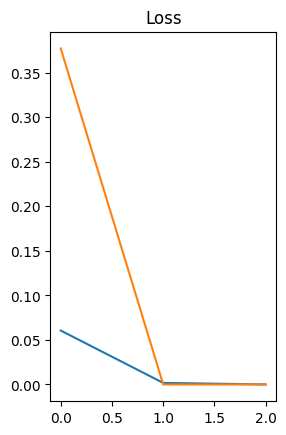

In [33]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [34]:
image = 'test1.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [35]:
predict = model.predict(img_bat)

1/1 [==============================] - 2s 2s/step


In [36]:
score=tf.nn.softmax(predict)

In [37]:
score

<tf.Tensor: shape=(1, 35), dtype=float32, numpy=
array([[0.02776538, 0.0277885 , 0.03258188, 0.02777744, 0.02783307,
        0.02774262, 0.0277673 , 0.02902165, 0.02777382, 0.02772027,
        0.02771972, 0.03207375, 0.02932168, 0.02771841, 0.02803143,
        0.03006282, 0.02804104, 0.02777023, 0.02773163, 0.02772843,
        0.02774878, 0.02803391, 0.02788044, 0.02822785, 0.02789414,
        0.02771579, 0.02772917, 0.02772991, 0.03591391, 0.02771682,
        0.02773612, 0.02777519, 0.02771666, 0.03247496, 0.02773525]],
      dtype=float32)>

In [39]:
data_cat=data_train.class_names

In [41]:
print('Alphabet in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Alphabet in image is T with accuracy of 3.59


In [21]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

# Assuming `data_cat` is the number of categories in your dataset
# and `input_shape` is the shape of your input images
data_cat = 35  # Assuming this is defined somewhere in your code
input_shape = (180, 180, 3)  # Assuming your input image shape is (180, 180, 3)

# Load pre-trained EfficientNet-B0 model
base_model = EfficientNetB0(input_shape=input_shape, include_top=False, weights='imagenet')

# Freeze the pre-trained weights
base_model.trainable = False

# Add custom classifier on top
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
output = tf.keras.layers.Dense(data_cat, activation='softmax')(x)

# Create the final model
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 180, 180, 3)          0         ['input_2[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 180, 180, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 180, 180, 3)          0         ['normalization[0][0]'] 

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming data_train and data_val are your training and validation datasets
# Perform any necessary preprocessing or formatting of the data beforehand

# Train the model
epochs_size = 3
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size, batch_size=32, verbose=1)

Epoch 1/3
1069/1069 [==============================] - 900s 826ms/step - loss: 0.0433 - accuracy: 0.9924 - val_loss: 1.4825e-04 - val_accuracy: 1.0000
Epoch 2/3
1069/1069 [==============================] - 831s 775ms/step - loss: 1.7737e-04 - accuracy: 1.0000 - val_loss: 3.8622e-05 - val_accuracy: 1.0000
Epoch 3/3
1069/1069 [==============================] - 655s 611ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 4.7478e-06 - val_accuracy: 1.0000


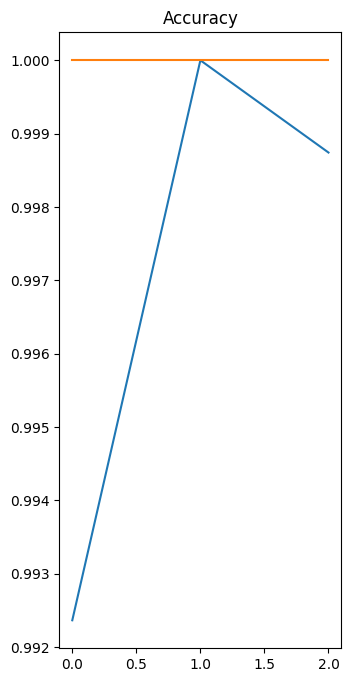

Text(0.5, 1.0, 'Loss')

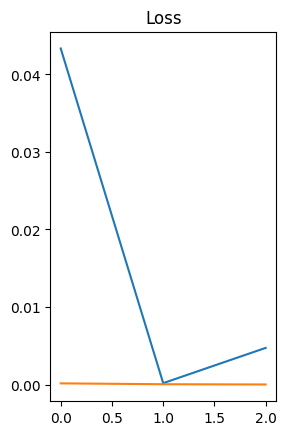

In [23]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [24]:
image = 'test1.jpg'
image =tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [25]:
predict = model.predict(img_bat)

1/1 [==============================] - 10s 10s/step


In [26]:
score=tf.nn.softmax(predict)

In [29]:
print('Alphabet in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score) * 100))


Alphabet in image is G with accuracy of 7.40
